
# Import required library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data Collection and Preprocessing

In [2]:
#loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv("C:/Users/91761/Desktop/csv1/car data.csv")

In [3]:
#inspecting the first five rows of the dataframes
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#checking the number of rows and column
car_dataset.shape

(301, 9)

In [5]:
# getting some information about the datasat
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Encoding the Categorical Data

In [8]:
#encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1,'CNG':2}},inplace=True)

#encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [9]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Splitting the Data and Target

In [10]:
x = car_dataset.drop(['Car_Name','Selling_Price'],axis=1) #if dropping a column, axis=1 and dropping a row, axis=0
y = car_dataset['Selling_Price']

In [11]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [12]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# Splitting the Data into Training Data and Test Data

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state=2)

# Model Training
    1.Linear Regression

In [14]:
#loading the linear regression model
lin_reg_model = LinearRegression()

In [15]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [16]:
#prediction on Training data
training_data_prediction = lin_reg_model.predict(x_train)

In [17]:
#R squad error
error_score = metrics.r2_score(y_train,training_data_prediction)
print("R Squad Error:",error_score)

R Squad Error: 0.8799451660493705


# Visualize the Actual Price and Predicted Prices

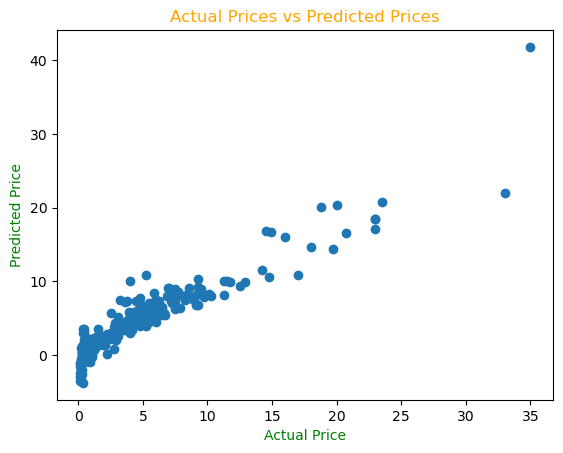

In [18]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Price",color='Green')
plt.ylabel("Predicted Price",color='green')
plt.title("Actual Prices vs Predicted Prices",color='orange')
plt.show()

In [19]:
#Prediction on Test Data
test_data_prediction = lin_reg_model.predict(x_test)

In [20]:
#R squad error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R Squad Error:",error_score)

R Squad Error: 0.836576671502687


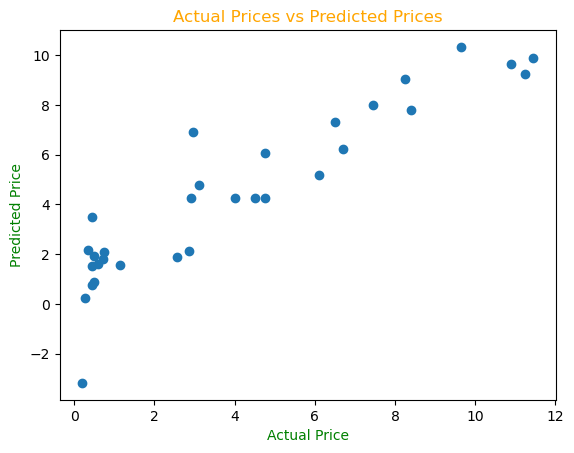

In [21]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price",color='Green')
plt.ylabel("Predicted Price",color='green')
plt.title("Actual Prices vs Predicted Prices",color='orange')
plt.show()

2. Lasso Regression

In [22]:
#loading the lasso regression model
las_reg_model = Lasso()

In [23]:
las_reg_model.fit(x_train,y_train)

Lasso()

# Model Evaluation

In [24]:
#prediction on Training data
training_data_prediction = las_reg_model.predict(x_train)

In [25]:
#R squad error
error_score = metrics.r2_score(y_train,training_data_prediction)
print("R Squad Error:",error_score)

R Squad Error: 0.8427856123435794


# Visualize the Actual Price and Predicted Prices


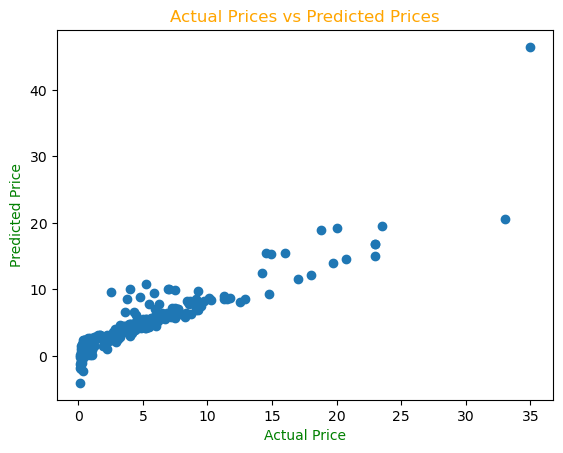

In [26]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Price",color='Green')
plt.ylabel("Predicted Price",color='green')
plt.title("Actual Prices vs Predicted Prices",color='orange')
plt.show()

In [27]:
#Prediction on Test Data
test_data_prediction = las_reg_model.predict(x_test)

In [28]:
#R squad error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R Squad Error:",error_score)

R Squad Error: 0.8709167941173195


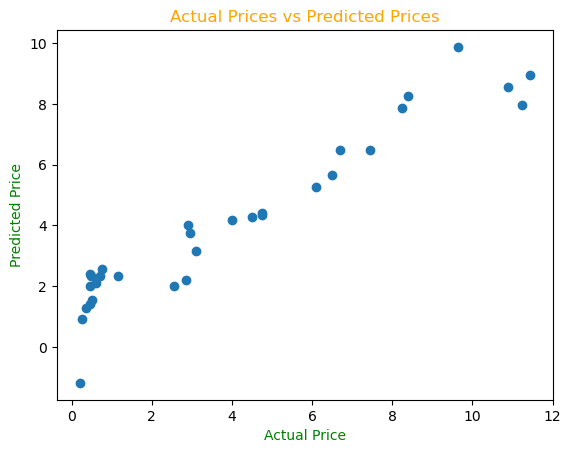

In [29]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price",color='Green')
plt.ylabel("Predicted Price",color='green')
plt.title("Actual Prices vs Predicted Prices",color='orange')
plt.show()